In [18]:
import glob as glob
import numpy as np
import pandas as pd
import pickle
import sklearn


from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.utils import shuffle

In [199]:
def load_box_as_df(filename):
    target_map = {"ice": 1, "null": 0}
    filename_parts = os.path.basename(filename).split("_")
    xlen = int(filename_parts[-3]) - int(filename_parts[-4]) # x1 - x0
    ylen = int(filename_parts[-1]) - int(filename_parts[-2]) # y1 - y0
    target = filename_parts[2]
    # these files are saved as a pickled list
    # I'm not sure what the list corresponds to, but checking to see 
    # that they're all length=1. If not, need to know why.
    box = pickle.load(open(filename, "rb")) 
    if len(box) == 1:
        box = box[0] # Keep the only item in list
    else:
        raise ValueError(f"File ({filename}) has length > 1, check file")
    fdf = pd.DataFrame(box[:,:].reshape(xlen*ylen, FEATURE_COLS)) # Dataframe of all pixels in box
    fdf["target"] = target_map[target]
    fdf["box_id"] = int(filename_parts[3].split("box")[1])
    return fdf

In [200]:
FEATURE_COLS = 19
files = glob.glob("data/selected_values/*")

pixel_labeled_df = pd.concat([load_box_as_df(f) for f in files])
pixel_labeled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,target,box_id
0,6322.0,15229.0,21262.0,29560.0,30135.0,30145.0,28741.0,33854.0,29928.0,39396.0,...,108410.0,90109.0,64507.0,65913.0,86639.0,89972.0,59867.0,44808.0,0,14
1,5825.0,15422.0,21841.0,30038.0,29507.0,29486.0,26757.0,33975.0,30409.0,39825.0,...,108520.0,91036.0,64098.0,65785.0,87066.0,89323.0,60274.0,43973.0,0,14
2,5982.0,14684.0,22263.0,30532.0,29726.0,28923.0,28232.0,35008.0,30307.0,40301.0,...,111552.0,92466.0,64248.0,66106.0,90845.0,89490.0,61468.0,44946.0,0,14
3,5762.0,15204.0,22663.0,30836.0,29148.0,29237.0,28308.0,34529.0,29727.0,39622.0,...,110980.0,91522.0,62630.0,66700.0,89439.0,90512.0,60422.0,45502.0,0,14
4,6180.0,14955.0,22253.0,29789.0,30521.0,30011.0,27898.0,32652.0,28621.0,39166.0,...,107240.0,92336.0,60997.0,66456.0,87452.0,90790.0,59280.0,44931.0,0,14


In [201]:
pixel_labeled_df.groupby(["target","box_id"]).count()

0     1     2     3     4     5     6     7     8     9  \
target box_id                                                               
0      5       1638  1638  1638  1638  1638  1638  1638  1638  1638  1638   
       6       1080  1080  1080  1080  1080  1080  1080  1080  1080  1080   
       7        350   350   350   350   350   350   350   350   350   350   
       8        168   168   168   168   168   168   168   168   168   168   
       14      3604  3604  3604  3604  3604  3604  3604  3604  3604  3604   
       15      2560  2560  2560  2560  2560  2560  2560  2560  2560  2560   
       16       455   455   455   455   455   455   455   455   455   455   
       17       420   420   420   420   420   420   420   420   420   420   
       18      2300  2300  2300  2300  2300  2300  2300  2300  2300  2300   
       19      1746  1746  1746  1746  1746  1746  1746  1746  1746  1746   
       20       560   560   560   560   560   560   560   560   560   560   
       21      5760  5760  5760  5760  5760  5760  5760  5760  5760  5760   
       22      1680  1680  1680  1680  1680  1680  1680  1680  1680  1680   
       23       529   529   529   529   529   529   529   529   529   529   
       24      3857  3857  3857  3857  3857  3857  3857  3857  3857  3857   
1      1        234   234   234   234   234   234   234   234   234   234   
       2         42    42    42    42    42    42    42    42    42    42   
       3         72    72    72    72    72    72    72    72    72    72   
       4         30    30    30    30    30    30    30    30    30    30   
       9         81    81    81    81    81    81    81    81    81    81   
       10        32    32    32    32    32    32    32    32    32    32   
       11        30    30    30    30    30    30    30    30    30    30   
       12        96    96    96    96    96    96    96    96    96    96   
       13       144   144   144   144   144   144   144   144   144   144   

                 10    11    12    13    14    15    16    17    18  
target box_id                                                        
0      5       1638  1638  1638  1638  1638  1638  1638  1638  1638  
       6       1080  1080  1080  1080  1080  1080  1080  1080  1080  
       7        350   350   350   350   350   350   350   350   350  
       8        168   168   168   168   168   168   168   168   168  
       14      3604  3604  3604  3604  3604  3604  3604  3604  3604  
       15      2560  2560  2560  2560  2560  2560  2560  2560  2560  
       16       455   455   455   455   455   455   455   455   455  
       17       420   420   420   420   420   420   420   420   420  
       18      2300  2300  2300  2300  2300  2300  2300  2300  2300  
       19      1746  1746  1746  1746  1746  1746  1746  1746  1746  
       20       560   560   560   560   560   560   560   560   560  
       21      5760  5760  5760  5760  5760  5760  5760  5760  5760  
       22      1680  1680  1680  1680  1680  1680  1680  1680  1680  
       23       529   529   529   529   529   529   529   529   529  
       24      3857  3857  3857  3857  3857  3857  3857  3857  3857  
1      1        234   234   234   234   234   234   234   234   234  
       2         42    42    42    42    42    42    42    42    42  
       3         72    72    72    72    72    72    72    72    72  
       4         30    30    30    30    30    30    30    30    30  
       9         81    81    81    81    81    81    81    81    81  
       10        32    32    32    32    32    32    32    32    32  
       11        30    30    30    30    30    30    30    30    30  
       12        96    96    96    96    96    96    96    96    96  
       13       144   144   144   144   144   144   144   144   144

In [202]:
pixel_labeled_df.groupby("target").count()
## That's about 3-4 times as many nulls, may need to balance the dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,box_id
target,,,,,,,,,,,,,,,,,,,,
0,26707,26707,26707,26707,26707,26707,26707,26707,26707,26707,26707,26707,26707,26707,26707,26707,26707,26707,26707,26707
1,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761


In [556]:
ice_box_train = [1, 4, 9, 13]
ice_cond = (pixel_labeled_df["target"] == 1) 
ice_train_cond = (pixel_labeled_df["box_id"].isin(ice_box_train))
ice_train = pixel_labeled_df[ice_cond & ice_train_cond].copy()
ice_test = pixel_labeled_df[ice_cond & ~ice_train_cond].copy()

print(ice_train.shape)
print(ice_test.shape)

null_box_train = [5, 6, 7, 14, 15, 16]
null_cond = (pixel_labeled_df["target"] == 0)
null_train_cond = (pixel_labeled_df["box_id"].isin(null_box_train))
null_train = shuffle(pixel_labeled_df[null_cond & null_train_cond]).iloc[:ice_train.shape[0]].copy()
null_test = pixel_labeled_df[null_cond & ~null_train_cond].copy()

print(null_train.shape)
print(null_test.shape)

(489, 21)
(272, 21)
(489, 21)
(17020, 21)


In [557]:
train_df = shuffle(pd.concat([ice_train, null_train]))

train_df.shape

(978, 21)

In [562]:
def preprocess(df, preprocess_pipe=None, idcols=["box_id"]):
    if not preprocess_pipe:
        preprocess_pipe = sklearn.preprocessing.MinMaxScaler()
    x = df.drop(columns=["target"]+idcols)
    print(x.shape)
    y = df["target"]
    x.replace([np.inf, -np.inf], np.nan, inplace=True)
    norm_col = x[0]
    x = x[[x for x in x.columns if x!=0]].div(norm_col, axis=0)
    x[0] = norm_col
    x.dropna(inplace=True)
    print(x.shape)
    #x = preprocess_pipe.fit_transform(x)
    return x, y, preprocess_pipe

In [563]:
model = LR()

train_x, train_y, pipe = preprocess(train_df)
model.fit(train_x, train_y)


(978, 19)
(978, 19)


LogisticRegression()

In [575]:
print(train_x.head())

           1         2         3         4         5         6          7   \
10   2.991918  4.889863  7.099894  7.386512  7.672034  7.429833  10.000690   
168  2.896469  4.821296  6.921110  7.157524  7.420822  7.399577   9.812644   
145  2.920870  4.230217  5.725652  5.318696  5.310870  5.086739   6.106304   
36   2.917958  4.802977  6.956722  7.192845  7.618214  7.328718   9.826949   
28   3.011743  5.027323  7.380137  7.804751  8.180974  7.983460  10.190606   

           8          9          10         11         12         13  \
10   8.896880  12.639456  17.514753  23.207117  22.814716  20.037558   
168  8.635318  12.447770  17.450462  23.833216  23.436684  20.382275   
145  5.612826   7.935217  10.746739  22.339348  17.757608  13.198479   
36   8.814689  12.548432  17.396761  22.599487  22.248657  19.677412   
28   9.282628  13.350282  18.422195  28.343798  27.252388  23.005909   

            14         15         16         17         18       0   
10   20.467768  23.145533  2

In [564]:
ice_test_x, ice_test_y, _ = preprocess(ice_test, preprocess_pipe=pipe)

(272, 19)
(272, 19)


In [565]:
model.score(ice_test_x, ice_test_y)

1.0

In [568]:
null_test_x, null_test_y, _ = preprocess(null_test, preprocess_pipe=pipe)
#model.score(null_test_x, null_test_y)

(17020, 19)
(17008, 19)


In [569]:
import matplotlib.pyplot as plt
%matplotlib inline

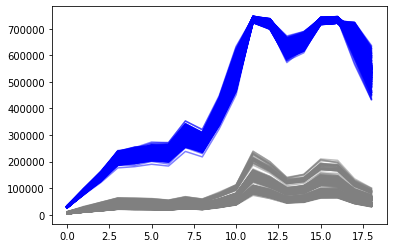

In [570]:
for i, row in null_train.iterrows():
    plt.plot(row[0:19], c="gray", alpha=0.5)
for i, row in ice_train.iterrows():
    plt.plot(row[0:19], c="b", alpha=0.5)


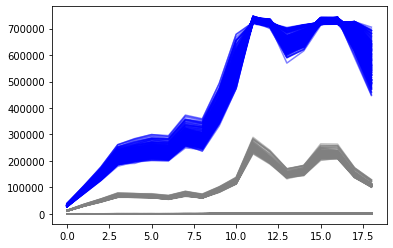

In [582]:
for i, row in null_test.iloc[1000:3000].iterrows():
    plt.plot(row[0:19], c="gray", alpha=0.5)
for i, row in ice_test.iterrows():
    plt.plot(row[0:19], c="b", alpha=0.5)

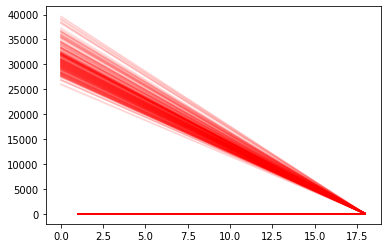

In [580]:
for i, row in ice_test_x.iterrows():
    plt.plot(row, c="r", alpha=0.1)
#for row in null_test_x[1000:4000]:
#    plt.plot(row, c="k", alpha=1)


In [581]:
ice_test_x

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,0
0,2.690718,4.457879,6.424824,6.870581,7.291117,7.085289,8.750785,8.558564,11.842726,16.769321,24.630314,24.004423,20.707262,21.660769,24.451735,24.467434,22.765135,18.893002,29617.0
1,2.803162,4.575214,6.740094,7.199450,7.532264,7.309845,9.241790,8.956439,12.403311,17.557266,24.484089,24.097775,21.388927,22.110735,24.290203,24.388790,23.270763,19.786505,29476.0
2,2.806645,4.525465,6.700858,7.156620,7.484215,7.302163,9.134338,8.913506,12.230350,17.060251,23.640314,23.408503,21.064636,21.683187,23.604034,23.517767,22.834904,19.625795,30788.0
3,2.757963,4.529475,6.573206,7.181039,7.535429,7.427455,9.344088,9.070576,12.417972,17.463846,22.772268,22.613977,21.065945,21.779482,22.743313,22.668861,22.656260,19.940042,31739.0
4,2.774456,4.493334,6.585248,6.887545,7.397693,7.256428,8.914981,8.752998,12.065215,17.197685,25.623554,24.921982,21.401491,22.412853,25.437511,25.485384,23.428295,19.416862,28429.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,2.941788,4.768283,7.049294,7.427278,7.944258,7.998011,10.380557,9.231442,13.343784,18.821796,25.591829,24.819223,21.612514,22.353115,25.269209,25.308762,22.174603,17.094814,29152.0
38,2.946387,4.855317,7.154908,7.373415,7.777948,7.905590,10.172768,9.234663,13.180300,18.744308,25.262373,24.786945,21.436605,22.156475,24.987968,25.134321,22.575119,17.575495,29340.0
39,2.977742,4.900803,7.205720,7.432963,7.844684,7.897543,9.944653,9.255634,12.954782,18.712013,26.174629,25.501139,21.771250,22.464544,25.724245,25.986013,22.645203,17.428406,28529.0
40,2.955461,4.851903,7.201117,7.463700,7.949841,7.827875,9.992002,9.238004,12.874966,18.450703,25.626724,25.196842,21.403234,22.268961,25.383617,25.612968,22.223352,17.399580,29008.0
